In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [0]:
!unzip indian-liver-patient-records.zip

Archive:  indian-liver-patient-records.zip
  inflating: indian_liver_patient.csv  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

breast-cancer-wisconsin-data.zip  heart.ipynb
Cancer.ipynb                      indian_liver_patient.csv
chronic-kidney-disease.zip        indian-liver-patient-records.zip
data.csv                          kidney.ipynb
diabetes.csv                      liver.ipynb
Diabeties.ipynb                   new_model.csv
heart.csv                         pima-indians-diabetes-database.zip
heart-disease-uci.zip


In [4]:
dataset=pd.read_csv('indian_liver_patient.csv')
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
dataset.isnull().values.any()

True

In [0]:
dataset=dataset.dropna(axis = 0, how ='any') 


In [7]:
dataset.isnull().values.any()

False

In [0]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


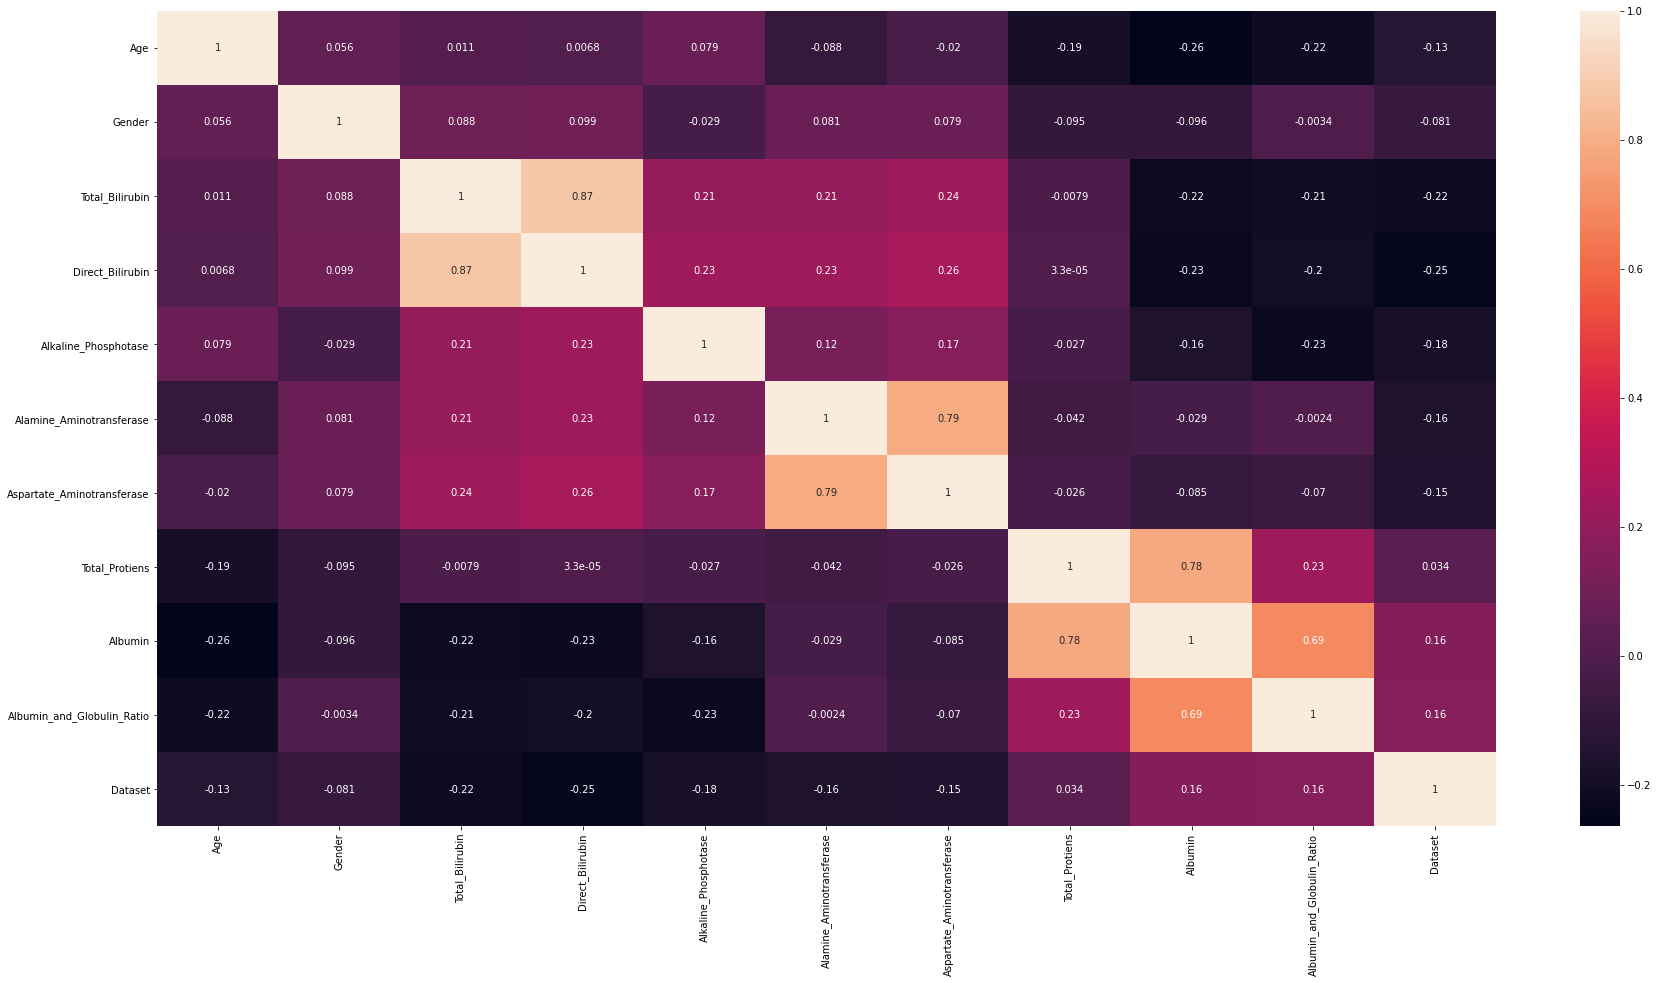

In [10]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [11]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [0]:
'''dataset=dataset.drop('Albumin',axis=1)
dataset=dataset.drop('Albumin_and_Globulin_Ratio',axis=1)
dataset=dataset.drop('Total_Bilirubin',axis=1)
dataset=dataset.drop('Aspartate_Aminotransferase',axis=1)
'''

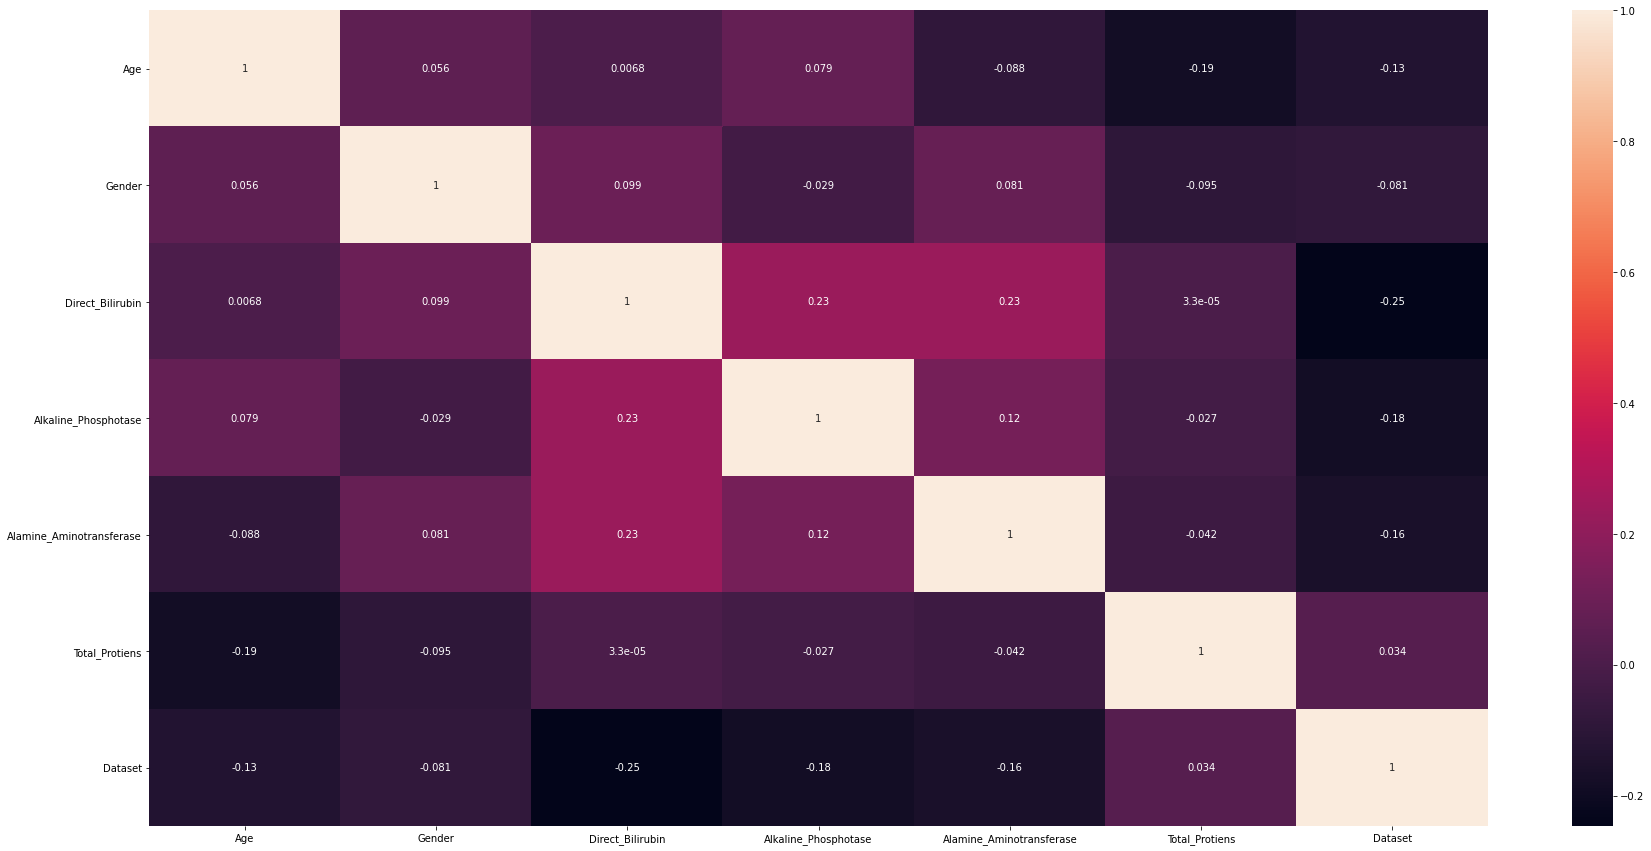

In [13]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

##Dataset spliting

In [0]:
features=dataset.iloc[:,:-1]
labels=dataset.iloc[:,[-1]]

In [15]:
features

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens
0,65,0,0.1,187,16,6.8
1,62,1,5.5,699,64,7.5
2,62,1,4.1,490,60,7.0
3,58,1,0.4,182,14,6.8
4,72,1,2.0,195,27,7.3
...,...,...,...,...,...,...
578,60,1,0.1,500,20,5.9
579,40,1,0.1,98,35,6.0
580,52,1,0.2,245,48,6.4
581,31,1,0.5,184,29,6.8


In [0]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [17]:
feature_train

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens
75,29,0,0.1,162,52,5.2
544,54,0,3.2,350,67,7.0
118,32,1,7.0,280,1350,5.6
323,12,1,0.2,302,47,6.7
280,58,1,0.2,123,56,6.0
...,...,...,...,...,...,...
71,75,0,0.2,188,20,4.4
106,36,1,2.3,145,32,5.1
273,30,1,0.2,262,15,9.6
439,42,0,0.2,168,25,6.2


In [18]:
label_train

,Dataset
75,2
544,1
118,1
323,2
280,1
...,...
71,1
106,2
273,1
439,1


##Logistic Regression

In [19]:
model=LogisticRegression()
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
label_pred=model.predict(feature_test)

In [21]:
m.accuracy_score(label_test,label_pred)

0.646551724137931

In [22]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1])

In [23]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1])

In [24]:
label_test

,Dataset
252,2
527,1
564,2
469,1
359,2
...,...
444,2
333,2
185,2
221,1


In [25]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.65      0.97      0.78        73
           2       0.67      0.09      0.16        43

    accuracy                           0.65       116
   macro avg       0.66      0.53      0.47       116
weighted avg       0.65      0.65      0.55       116



In [26]:
print(m.confusion_matrix(label_test,label_pred))

[[71  2]
 [39  4]]


#KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [28]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
model.best_params_

{'n_neighbors': 16}

In [30]:
model=KNeighborsClassifier(n_neighbors=16)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [0]:
label_pred=model.predict(feature_test)

In [32]:
m.accuracy_score(label_test,label_pred)

0.6206896551724138

In [33]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.64      0.90      0.75        73
           2       0.46      0.14      0.21        43

    accuracy                           0.62       116
   macro avg       0.55      0.52      0.48       116
weighted avg       0.57      0.62      0.55       116



In [34]:
print(m.confusion_matrix(label_test,label_pred))

[[66  7]
 [37  6]]


In [35]:
label_pred

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1])

In [36]:
label_test

,Dataset
252,2
527,1
564,2
469,1
359,2
...,...
444,2
333,2
185,2
221,1


##Decision Tree

In [0]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20)),'criterion':['gini','entropy']}


In [44]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [45]:
model.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [49]:
model=DecisionTreeClassifier(max_depth=1)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
label_pred=model.predict(feature_test)

In [51]:
m.accuracy_score(label_test,label_pred)

0.6293103448275862

In [52]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.63      1.00      0.77        73
           2       0.00      0.00      0.00        43

    accuracy                           0.63       116
   macro avg       0.31      0.50      0.39       116
weighted avg       0.40      0.63      0.49       116



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(m.confusion_matrix(label_test,label_pred))

[[73  0]
 [43  0]]


In [54]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [55]:
label_test

,Dataset
252,2
527,1
564,2
469,1
359,2
...,...
444,2
333,2
185,2
221,1


##SVM

In [56]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
label_pred=model.predict(feature_test)

In [58]:
m.accuracy_score(label_test,label_pred)

0.6293103448275862

In [59]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.63      1.00      0.77        73
           2       0.00      0.00      0.00        43

    accuracy                           0.63       116
   macro avg       0.31      0.50      0.39       116
weighted avg       0.40      0.63      0.49       116



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print(m.confusion_matrix(label_test,label_pred))

[[73  0]
 [43  0]]


In [61]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [62]:
label_test

,Dataset
252,2
527,1
564,2
469,1
359,2
...,...
444,2
333,2
185,2
221,1


##Random Forest Classifier

In [0]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],'max_depth':list(np.arange(1,20))}


In [64]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [65]:
model.best_params_

{'max_depth': 10, 'n_estimators': 180}

In [0]:
model=model.best_estimator_

In [0]:
label_pred=model.predict(feature_test)

In [68]:
m.accuracy_score(label_test,label_pred)

0.6293103448275862

In [69]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.64      0.92      0.76        73
           2       0.50      0.14      0.22        43

    accuracy                           0.63       116
   macro avg       0.57      0.53      0.49       116
weighted avg       0.59      0.63      0.56       116



In [70]:
print(m.confusion_matrix(label_test,label_pred))

[[67  6]
 [37  6]]


In [71]:
label_pred

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1])

In [72]:
label_test

,Dataset
252,2
527,1
564,2
469,1
359,2
...,...
444,2
333,2
185,2
221,1
